In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as plt

In [2]:
df = pd.read_csv('2.csv')
df.head()

,x,Curve1,Curve2,Curve1-1,Curve1-2,Curve1-3
0,40.423,1.6084,NaN,NaN,NaN,NaN
1,44.883,1.5734,NaN,NaN,NaN,NaN
2,49.681,1.5385,NaN,NaN,NaN,NaN
3,54.281,1.4336,NaN,NaN,NaN,NaN
4,59.557,1.3287,NaN,NaN,NaN,NaN


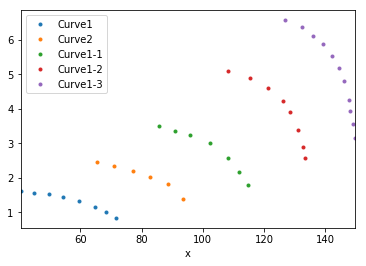

In [5]:
df.plot(style = '.')

In [4]:
#df.set_index('x', inplace=True)

In [12]:
import hdbscan

In [11]:
#!pip install hdbscan

    100% |████████████████████████████████| 5.1MB 134kB/s eta 0:00:01
  Running setup.py bdist_wheel for hdbscan ... done
  Stored in directory: /Users/mac/Library/Caches/pip/wheels/2e/8a/87/4275d3647416bf4267ff4483a7046f4d736223b3f071fd71ff
Successfully built hdbscan


In [20]:
df1 = df.sum(axis = 'columns')
df1.head()

x
40.423    1.6084
44.883    1.5734
49.681    1.5385
54.281    1.4336
59.557    1.3287
dtype: float64

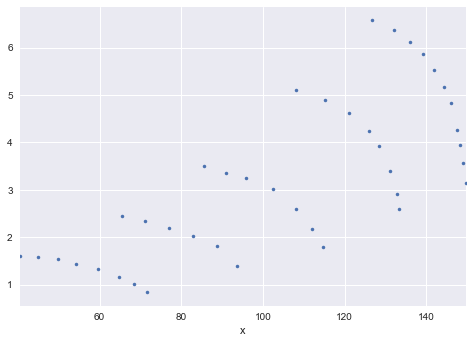

In [21]:
df1.plot(style = '.')

In [18]:
hdb = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True).fit(df1.reset_index().values)

In [22]:
hdb.labels_

array([-1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1])

In [23]:
dfclustered = df1.copy(deep = True)
dfclustered = dfclustered.to_frame()
dfclustered.head()

,0
x,
40.423,1.6084
44.883,1.5734
49.681,1.5385
54.281,1.4336
59.557,1.3287


In [24]:
dfclustered['HDBSCAN'] = hdb.labels_
dfclustered.head()

,0,HDBSCAN
x,,
40.423,1.6084,-1
44.883,1.5734,-1
49.681,1.5385,-1
54.281,1.4336,-1
59.557,1.3287,-1


In [26]:
dfclustered.columns = ['y', 'HDBSCAN']
dfclustered.head()

,y,HDBSCAN
x,,
40.423,1.6084,-1
44.883,1.5734,-1
49.681,1.5385,-1
54.281,1.4336,-1
59.557,1.3287,-1


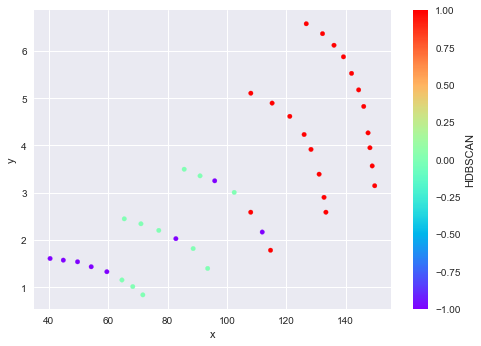

In [27]:
dfclustered.reset_index().plot(kind='scatter', x = 'x', y = 'y', c = 'HDBSCAN', colormap = 'rainbow', sharex = False)

In [28]:
def normalize(_arr, ):
    minv, maxv = min(_arr), max(_arr)
    return (_arr - minv) / (maxv - minv)

In [29]:
dfclustered.index = normalize(dfclustered.index)
dfclustered['y'] = normalize(dfclustered['y'])

In [30]:
dfclustered.head()

,y,HDBSCAN
x,,
0.000000,0.134143,-1
0.040775,0.128039,-1
0.084640,0.121952,-1
0.126695,0.103659,-1
0.174930,0.085365,-1


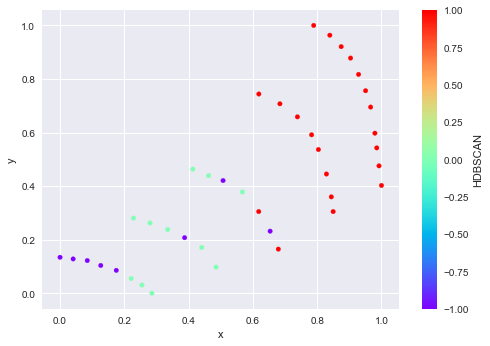

In [31]:
dfclustered.reset_index().plot(kind='scatter', x = 'x', y = 'y', c = 'HDBSCAN', colormap = 'rainbow', sharex = False)